## determine whether a person makes over 50K a year.

### Attribute Information:

### Data Injestion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
# reading the dataset
df=pd.read_csv('adult.csv')

In [5]:
# first 5 records
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
# bottom 5 records
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## EDA & Preprocessing

In [6]:
# overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Cleaning the dataset

In [8]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [9]:
df['age'].unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87], dtype=int64)

In [11]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [13]:
df[df['workclass']=='?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [14]:
indexes=df[df['workclass']=='?'].index
indexes

Int64Index([    0,     2,    14,    24,    44,    48,    49,    76,   114,
              133,
            ...
            32440, 32483, 32496, 32500, 32528, 32533, 32534, 32541, 32543,
            32544],
           dtype='int64', length=1836)

In [15]:
# Removing all hte records with '?'
df.drop(index=indexes,inplace=True)

In [16]:
df[df['workclass']=='?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [17]:
df['fnlwgt'].value_counts()

164190    13
203488    13
126675    12
148995    12
113364    12
          ..
323269     1
172296     1
182750     1
83610      1
201490     1
Name: fnlwgt, Length: 20498, dtype: int64

In [18]:
df['fnlwgt'].unique()

array([132870, 140359, 264663, ...,  84661, 257302, 201490], dtype=int64)

In [19]:
df['education'].value_counts()

HS-grad         9969
Some-college    6777
Bachelors       5182
Masters         1675
Assoc-voc       1321
11th            1057
Assoc-acdm      1020
10th             833
7th-8th          574
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          303
1st-4th          156
Preschool         46
Name: education, dtype: int64

In [20]:
df['education'].unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [21]:
df['education.num'].value_counts()

9     9969
10    6777
13    5182
14    1675
11    1321
7     1057
12    1020
6      833
4      574
15     558
5      463
16     398
8      393
3      303
2      156
1       46
Name: education.num, dtype: int64

In [22]:
df['education.num'].unique()

array([ 9,  4, 10,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
      dtype=int64)

In [23]:
df['marital.status'].value_counts()

Married-civ-spouse       14340
Never-married             9917
Divorced                  4259
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: marital.status, dtype: int64

In [24]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
?                       7
Name: occupation, dtype: int64

In [27]:
indexes=df[df['occupation']=='?'].index
indexes

Int64Index([8874, 13675, 17089, 21934, 24483, 32331, 32338], dtype='int64')

In [28]:
df.drop(index=indexes,inplace=True)

In [30]:
df[df['occupation']=='?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [31]:
df['relationship'].value_counts()

Husband           12704
Not-in-family      7865
Own-child          4525
Unmarried          3271
Wife               1435
Other-relative      918
Name: relationship, dtype: int64

In [32]:
df['race'].value_counts()

White                 26301
Black                  2909
Asian-Pac-Islander      974
Amer-Indian-Eskimo      286
Other                   248
Name: race, dtype: int64

In [33]:
df['sex'].value_counts()

Male      20788
Female     9930
Name: sex, dtype: int64

In [34]:
df['capital.gain'].value_counts()

0        28129
15024      343
7688       278
7298       244
99999      155
         ...  
6097         1
1639         1
7978         1
2387         1
22040        1
Name: capital.gain, Length: 118, dtype: int64

In [35]:
df['capital.gain'].unique()

array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1086,  1055,   991,   914,   594,   401,
         114], dtype=int64)

In [36]:
df['capital.loss'].value_counts()

0       29257
1902      199
1977      167
1887      157
1848       50
        ...  
1844        1
2201        1
1944        1
1411        1
4356        1
Name: capital.loss, Length: 90, dtype: int64

In [37]:
df['capital.loss'].unique()

array([4356, 3900, 3770, 3683, 3004, 2824, 2754, 2603, 2559, 2547, 2472,
       2467, 2457, 2444, 2415, 2392, 2377, 2352, 2339, 2282, 2267, 2258,
       2246, 2238, 2231, 2206, 2205, 2201, 2179, 2174, 2149, 2129, 2080,
       2057, 2051, 2042, 2002, 2001, 1980, 1977, 1974, 1944, 1902, 1887,
       1876, 1848, 1844, 1825, 1816, 1762, 1755, 1741, 1740, 1735, 1726,
       1721, 1719, 1672, 1669, 1668, 1651, 1648, 1628, 1617, 1602, 1594,
       1590, 1579, 1573, 1564, 1539, 1504, 1485, 1411, 1408, 1380, 1340,
       1258, 1138, 1092,  974,  880,  810,  653,  625,  419,  323,  213,
        155,    0], dtype=int64)

In [38]:
df['hours.per.week'].value_counts()

40    14525
50     2763
45     1791
60     1441
35     1203
      ...  
94        1
82        1
92        1
87        1
74        1
Name: hours.per.week, Length: 94, dtype: int64

In [39]:
df['hours.per.week'].unique()

array([18, 40, 45, 20, 60, 35, 55, 76, 50, 42, 25, 32, 90, 48, 70, 52, 72,
       39,  6, 65, 80, 67, 99, 30, 75, 12, 26, 10, 84, 38, 62, 44,  8, 28,
       59,  5, 24, 57, 34, 37, 46, 56, 41, 98, 43, 15, 63,  1, 36, 47, 68,
       54,  2, 16,  9,  3,  4, 33, 23, 22, 64, 51, 19, 58, 53, 96, 66, 21,
        7, 13, 27, 14, 77, 31, 78, 11, 49, 17, 85, 87, 88, 73, 89, 97, 94,
       29, 82, 86, 91, 81, 92, 61, 74, 95], dtype=int64)

In [40]:
df['native.country'].value_counts()

United-States                 27504
Mexico                          610
?                               556
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Haiti                            42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                      

In [43]:
indexes=df[df['native.country']=='?'].index
indexes

Int64Index([    9,    18,    65,    86,    87,   132,   148,   150,   240,
              429,
            ...
            31804, 31889, 32022, 32254, 32268, 32428, 32459, 32476, 32498,
            32515],
           dtype='int64', length=556)

In [44]:
df.drop(index=indexes,inplace=True)

In [45]:
df[df['native.country']=='?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [46]:
df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [47]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [48]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We have cleaned the dataset and now it's time for Encoding the object data type columns

In [67]:
df.to_csv("clean.csv")

In [2]:
df=pd.read_csv("clean.csv").reset_index()

In [3]:
df.drop('index',axis=1,inplace=True)

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [6]:
cat_col=[]
num_col=[]
for column in df.columns:
    if(df[column].dtype=='O'):
        cat_col.append(column)
    else:
        num_col.append(column)

In [7]:
# Categorical columns
cat_col

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [8]:
# Numerical columns
num_col

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

### Distribution of Numerical columns

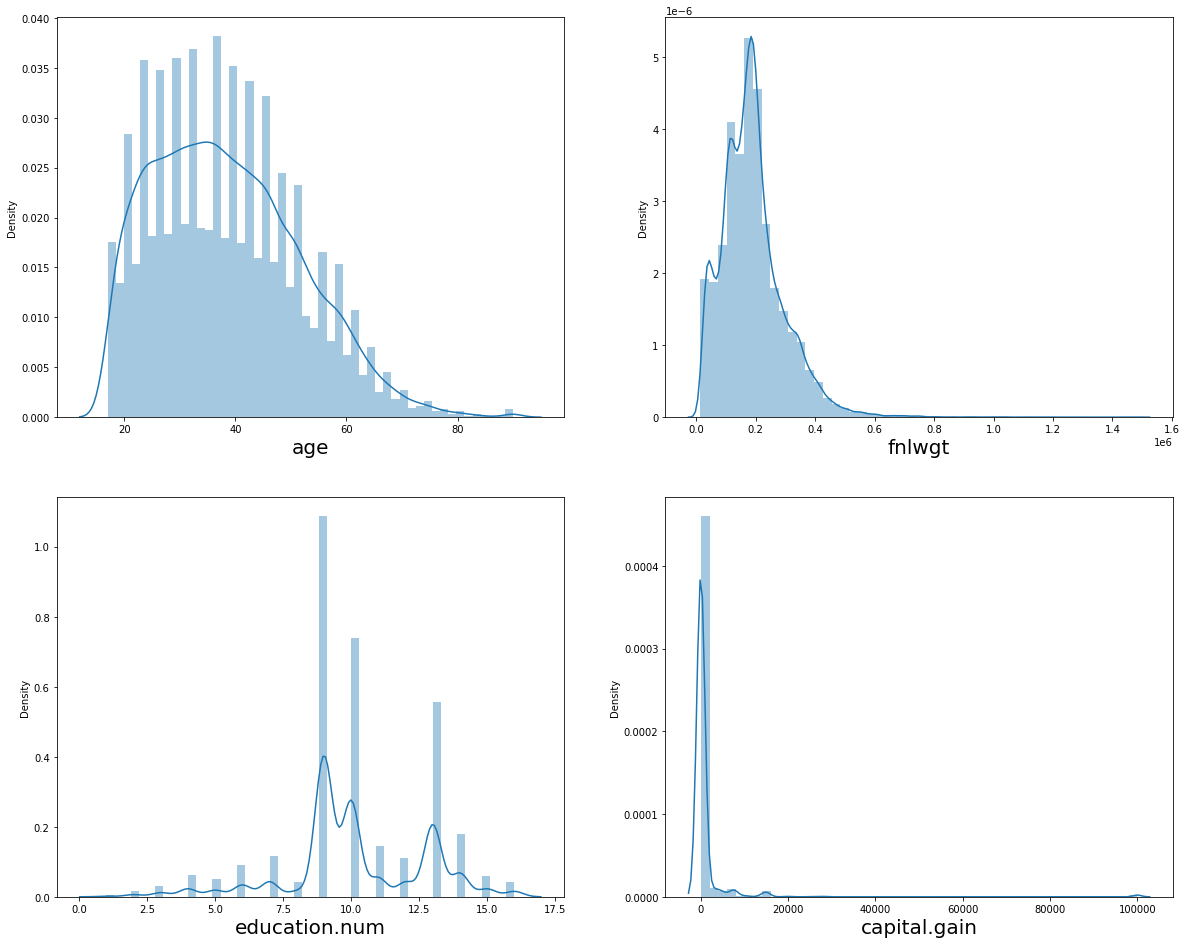

In [70]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in num_col:
    if plotnumber<=4 :     # as there are 4 columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above graphs we can conclude that all the four numerical columns are not normally distributed

<AxesSubplot: >

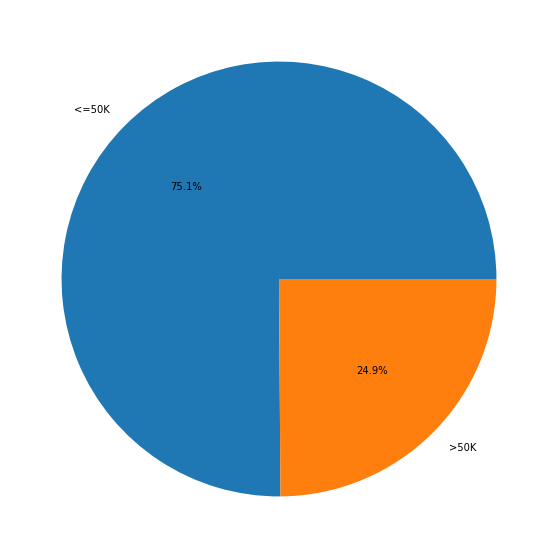

In [96]:
df['income'].value_counts().plot.pie(y=df['income'],figsize=(15,10),label = '', autopct = '%1.1f%%')

In [105]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

<AxesSubplot: >

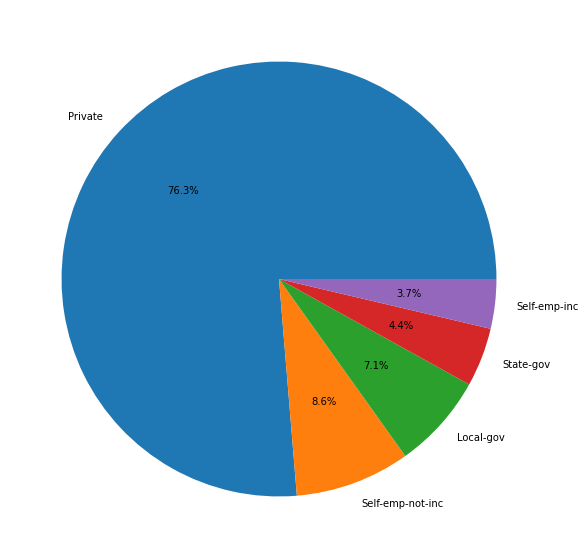

In [107]:
df['workclass'].value_counts()[:5].plot.pie(y=df['workclass'],figsize=(15,10),label = '', autopct = '%1.1f%%')

In [4]:
df_clean=pd.read_csv("clean.csv")
df_clean.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df_clean

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30158,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30159,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30160,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [20]:
df_clean['occupation'].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Transport-moving', 'Sales',
       'Craft-repair', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Handlers-cleaners', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [24]:
df_greater=df_clean[df_clean['income']=='>50K']
df_greater

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
5,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
7,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
8,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
9,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
10,32,Private,136204,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30140,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
30143,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
30148,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
30156,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [25]:
df_below=df_clean[df_clean['income']=='<=50K']
df_below

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30155,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
30157,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30158,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30160,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<AxesSubplot: >

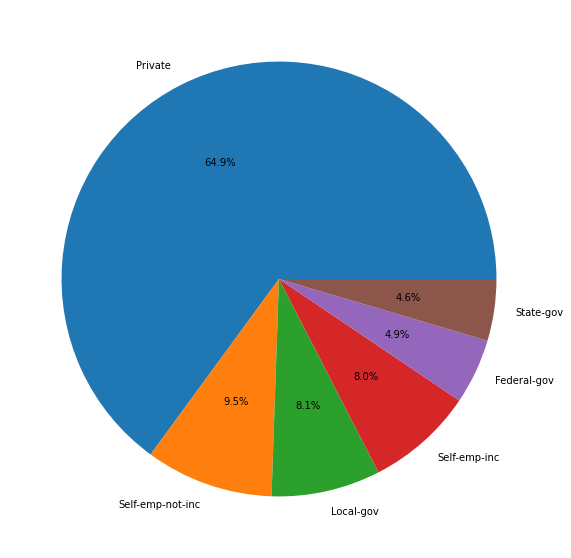

In [28]:
df_greater['workclass'].value_counts().plot.pie(y=df_greater['workclass'],figsize=(15,10),label = '', autopct = '%1.1f%%')

Majority of the salary holders above 50k are from Private class

<AxesSubplot: >

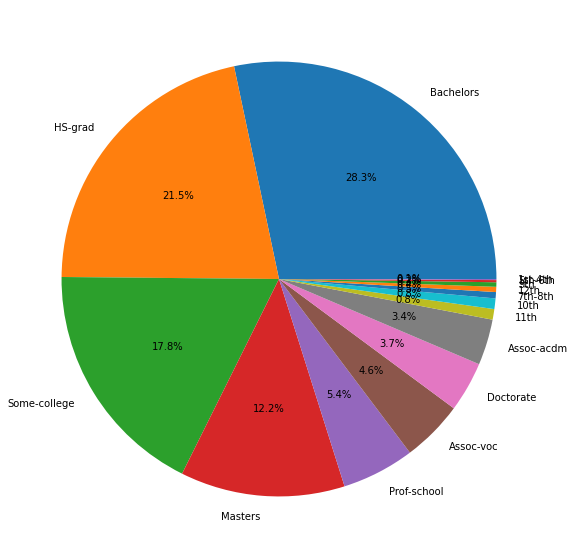

In [29]:
df_greater['education'].value_counts().plot.pie(y=df_greater['education'],figsize=(15,10),label = '', autopct = '%1.1f%%')

Majorly those who completed the Bachelors degree , HS-grad and Some-college and Masters degree are earning significant portion of >50k class

<AxesSubplot: >

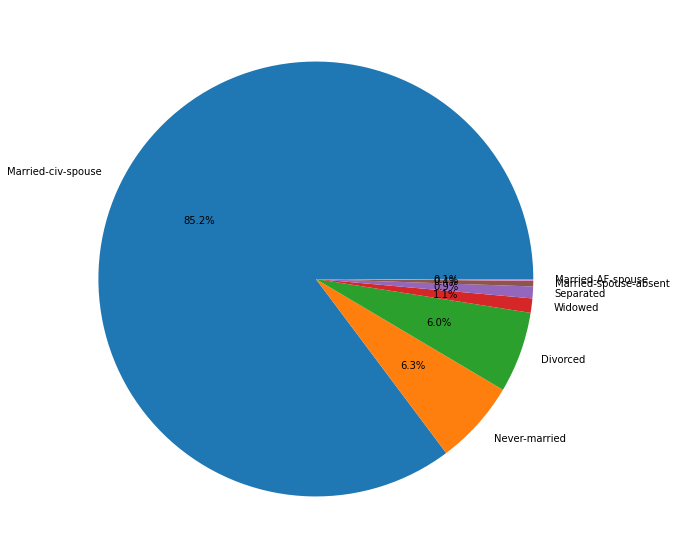

In [30]:
df_greater['marital.status'].value_counts().plot.pie(y=df_greater['marital.status'],figsize=(15,10),label = '', autopct = '%1.1f%%')

We could see majority of the portion occupied by the marital-status: Married-civ-spouse who is having income >50k

<AxesSubplot: >

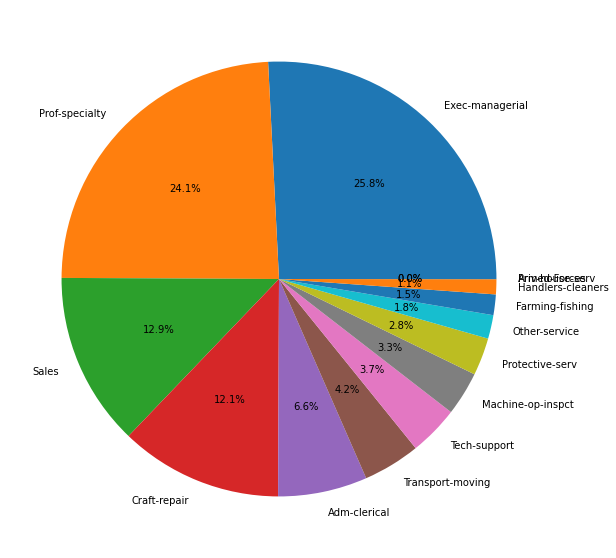

In [31]:
df_greater['occupation'].value_counts().plot.pie(y=df_greater['occupation'],figsize=(15,10),label = '', autopct = '%1.1f%%')

We could see singificant part from Exec-managerial , Prof-specially,Sales and Craft-repair

<AxesSubplot: >

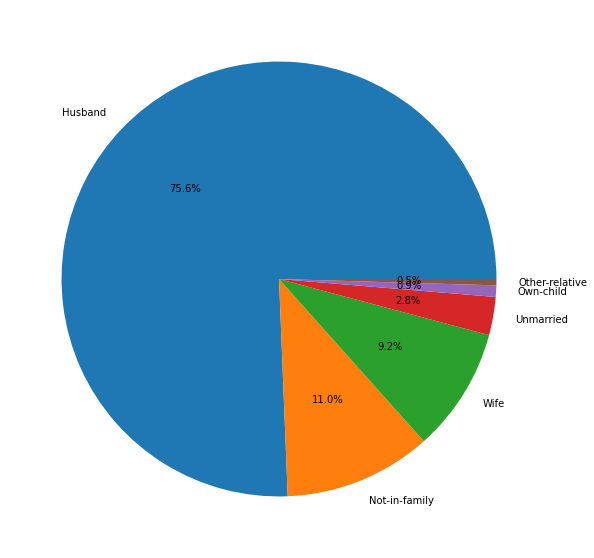

In [32]:
df_greater['relationship'].value_counts().plot.pie(y=df_greater['relationship'],figsize=(15,10),label = '', autopct = '%1.1f%%')

We could see Husband relationship is dominating completely and they are earning huge part of income of >50k

<AxesSubplot: >

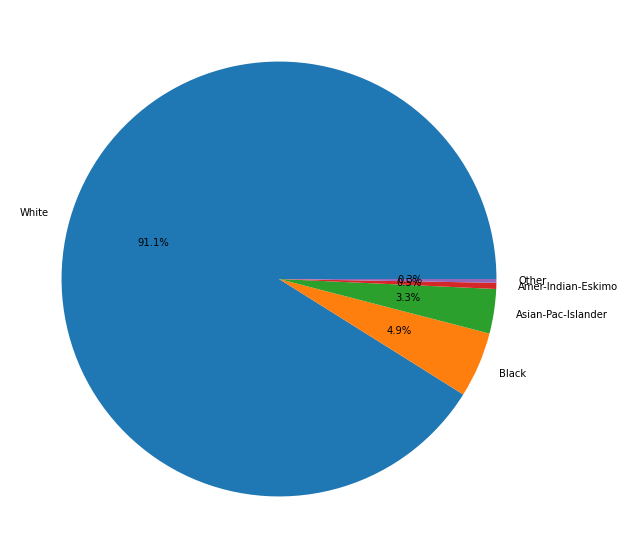

In [33]:
df_greater['race'].value_counts().plot.pie(y=df_greater['race'],figsize=(15,10),label = '', autopct = '%1.1f%%')

Completely white race people dominating the category who is earning more than 50k

<AxesSubplot: >

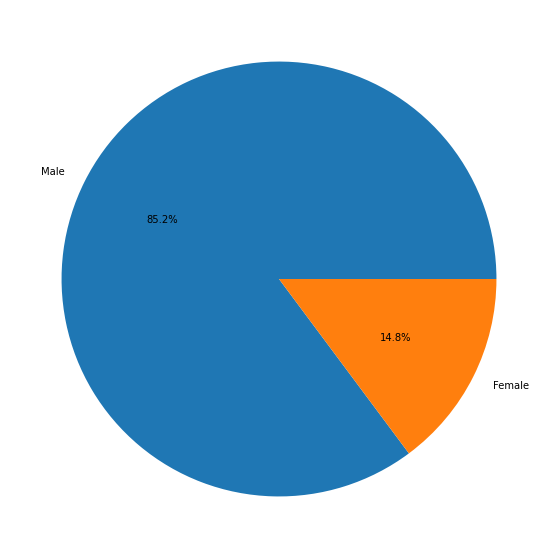

In [34]:
df_greater['sex'].value_counts().plot.pie(y=df_greater['sex'],figsize=(15,10),label = '', autopct = '%1.1f%%')

Completely Male people are earning more than 50k of the majority of the portion

## Encoding the categorical data

In [37]:
cat_col=[]
num_col=[]
for column in df_clean.columns:
    if(df_clean[column].dtype=='O'):
        cat_col.append(column)
    else:
        num_col.append(column)

In [38]:
cat_col

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [39]:
df_encode=pd.get_dummies(df_clean,columns = cat_col)

In [40]:
df_encode

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,34,216864,9,0,3770,45,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,38,150601,6,0,3770,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,310152,10,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
30158,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
30159,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
30160,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [45]:
df_encode.to_csv("encoded_data.csv")

In [47]:
df_encode.dtypes

age                             int64
fnlwgt                          int64
education.num                   int64
capital.gain                    int64
capital.loss                    int64
                                ...  
native.country_United-States    uint8
native.country_Vietnam          uint8
native.country_Yugoslavia       uint8
income_<=50K                    uint8
income_>50K                     uint8
Length: 106, dtype: object

In [4]:
df_encode=pd.read_csv("encoded_data.csv")
df_encode

,Unnamed: 0,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,0,82,132870,9,0,4356,18,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,1,54,140359,4,0,3900,40,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,2,41,264663,10,0,3900,40,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,3,34,216864,9,0,3770,45,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,4,38,150601,6,0,3770,40,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,30157,22,310152,10,0,0,40,0,0,1,...,0,0,0,0,0,1,0,0,1,0
30158,30158,27,257302,12,0,0,38,0,0,1,...,0,0,0,0,0,1,0,0,1,0
30159,30159,40,154374,9,0,0,40,0,0,1,...,0,0,0,0,0,1,0,0,0,1
30160,30160,58,151910,9,0,0,40,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [6]:
df_encode.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df_encode

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,34,216864,9,0,3770,45,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,38,150601,6,0,3770,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,310152,10,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
30158,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
30159,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
30160,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [8]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Columns: 106 entries, age to income_>50K
dtypes: int64(106)
memory usage: 24.4 MB


In [14]:
X=df_encode.drop(['income_>50K','income_<=50K'],axis=1)
y=df_encode['income_>50K']
X

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,34,216864,9,0,3770,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,38,150601,6,0,3770,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,310152,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30158,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30159,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30160,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
y

0        0
1        0
2        0
3        0
4        0
        ..
30157    0
30158    0
30159    1
30160    0
30161    0
Name: income_>50K, Length: 30162, dtype: int64

In [16]:
#split the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42)

In [17]:
X_train.sample(2)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
20351,45,175925,10,0,0,60,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7997,33,279524,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
y_train.sample(2)

16644    1
18299    0
Name: income_>50K, dtype: int64

In [19]:
X_test.sample(2)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
28588,39,174343,5,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
13649,55,124137,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y_test.sample(2)

15984    1
10961    0
Name: income_>50K, dtype: int64

In [21]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((22621, 104), (22621,), (7541, 104), (7541,))

In [22]:
# standadize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
scaler

StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.20020729, -0.18779328,  1.12453286, ...,  0.31202727,
        -0.04514036, -0.02575928],
       [-1.40393979,  2.31970054, -0.43855348, ..., -3.2048481 ,
        -0.04514036, -0.02575928],
       [ 2.64462188, -1.51558641, -0.43855348, ...,  0.31202727,
        -0.04514036, -0.02575928],
       ...,
       [-1.02200001,  0.03521985,  1.12453286, ...,  0.31202727,
        -0.04514036, -0.02575928],
       [-0.25812044, -0.68944519,  1.12453286, ...,  0.31202727,
        -0.04514036, -0.02575928],
       [-0.86922409, -0.46542052, -0.43855348, ...,  0.31202727,
        -0.04514036, -0.02575928]])

In [25]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.50575912,  0.16083135,  0.73376128, ..., -3.2048481 ,
        -0.04514036, -0.02575928],
       [-1.25116387,  0.06894125, -0.43855348, ...,  0.31202727,
        -0.04514036, -0.02575928],
       [ 0.04743138, -0.7452032 ,  1.12453286, ...,  0.31202727,
        -0.04514036, -0.02575928],
       ...,
       [ 0.8876989 ,  0.34413888, -0.04778189, ...,  0.31202727,
        -0.04514036, -0.02575928],
       [-0.94561205,  0.94649176, -0.04778189, ...,  0.31202727,
        -0.04514036, -0.02575928],
       [-0.71644818,  0.02890477, -0.43855348, ...,  0.31202727,
        -0.04514036, -0.02575928]])

### Model training

In [27]:
from sklearn.svm import SVC
model=SVC()

In [30]:
from sklearn.model_selection import GridSearchCV

# defining parameter range'
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel':['rbf','sigmoid']}

grid = GridSearchCV(model, param_grid, refit = True, verbose = 3,cv=2)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.758 total time= 1.1min
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.758 total time= 1.1min
[CV 1/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.758 total time=  12.0s
[CV 2/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.701 total time=  17.5s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.785 total time=  38.3s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.788 total time=  37.7s
[CV 1/2] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.740 total time=  13.2s
[CV 2/2] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.751 total time=  12.8s
[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.831 total time=  22.9s
[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.832 total time=  23.2s
[CV 1/2] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.838 total time=  14.1s
[CV 2/2] END .C=0.1, gamma=0.01, kernel=sigmoid

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [31]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [33]:
model=grid.best_estimator_

In [34]:
model

SVC(C=1000, gamma=0.0001)

In [35]:
model.fit(X_train, y_train)

SVC(C=1000, gamma=0.0001)

In [36]:
model.score(X_train, y_train,)

0.8580964590424827

In [39]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8424612120408433

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [44]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_predict)
conf_mat

array([[5252,  391],
       [ 797, 1101]], dtype=int64)

In [45]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [46]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8424612120408433

In [47]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9307106149211413

In [48]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8682426847412795

In [49]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8983920629490251

### Logistic Regression

In [51]:
model1=LogisticRegression()

In [52]:
model1

LogisticRegression()

In [54]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = model1,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           verbose=3)
grid_search.fit(X_train, y_train) 

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 2/2] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 1/2] END ........................penalty=l2;, score=0.850 total time=   0.1s
[CV 2/2] END ........................penalty=l2;, score=0.848 total time=   0.1s
[CV 1/2] END ...............................C=1;, score=0.850 total time=   0.1s
[CV 2/2] END ...............................C=1;, score=0.848 total time=   0.1s
[CV 1/2] END ..............................C=10;, score=0.850 total time=   0.1s
[CV 2/2] END ..............................C=10;, score=0.848 total time=   0.1s
[CV 1/2] END .............................C=100;, score=0.850 total time=   0.2s
[CV 2/2] END .............................C=100;, score=0.848 total time=   0.1s
[CV 1/2] END ............................C=1000;, score=0.850 total time=   0.2s
[CV 2/2] END ............................C=1000;,

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy', verbose=3)

In [55]:
grid_search.best_params_

{'penalty': 'l2'}

In [57]:
model1=grid_search.best_estimator_

In [58]:
model1

LogisticRegression()

In [59]:
model1.fit(X_train, y_train)

LogisticRegression()

In [60]:
model1.score(X_train, y_train)

0.8517748994297334

In [69]:
y_pred=model1.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8440525129293197

In [77]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[5222,  421],
       [ 755, 1143]], dtype=int64)

In [78]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [79]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8440525129293197

In [80]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9253942938153464

In [81]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8736824493893257

In [82]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8987951807228914

### Observations

For this dataset SVC and Logistic Regression both are perfroming equally

In [83]:
conclusion=pd.DataFrame({"Model":['SVR','Logistic Regression'],"Accuracy":[0.8424612120408433,0.8440525129293197],"Precision":[0.9307106149211413,0.9253942938153464],"Recall":[0.8682426847412795,0.8682426847412795],"F1_Score":[0.8983920629490251,0.8983920629490251]})

In [84]:
conclusion

,Model,Accuracy,Precision,Recall,F1_Score
0,SVR,0.842461,0.930711,0.868243,0.898392
1,Logistic Regression,0.844053,0.925394,0.868243,0.898392
